# 🏷️ Agrupamiento Jerárquico para Optimización del Almacenamiento
Este cuaderno aplica un algoritmo de **Agrupamiento Jerárquico Aglomerativo** para analizar la similitud entre ítems en un almacén. El objetivo es reorganizar los ítems en función de características como **frecuencia de uso, volumen y peso**, para optimizar su ubicación y acceso.

## 📚 Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

## 📂 Paso 2: Cargar archivo CSV de ítems de almacén

In [2]:
from google.colab import files
import io

uploaded = files.upload()
for archivo in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded[archivo]))
    break
df.head()

Saving datos_almacen_clustering.csv to datos_almacen_clustering.csv


,Item_ID,Frecuencia_uso,Volumen,Peso,Categoria
0,Item_001,52,0.63,5.42,C
1,Item_002,93,1.13,41.93,C
2,Item_003,15,0.37,16.72,B
3,Item_004,72,1.62,10.14,C
4,Item_005,61,0.24,3.00,B


## 📊 Paso 3: Visualización básica de los datos

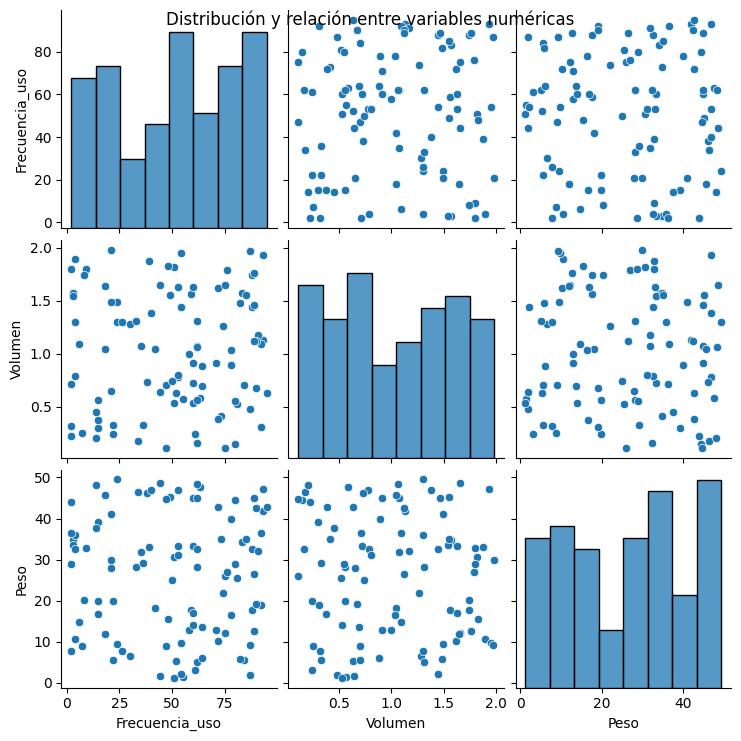

In [3]:
sns.pairplot(df.drop(columns=['Item_ID', 'Categoria']))
plt.suptitle('Distribución y relación entre variables numéricas')
plt.show()

## ⚙️ Paso 4: Estandarización de variables numéricas

In [4]:
# Selección de variables relevantes
X = df[['Frecuencia_uso', 'Volumen', 'Peso']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🌿 Paso 5: Dendrograma del agrupamiento jerárquico

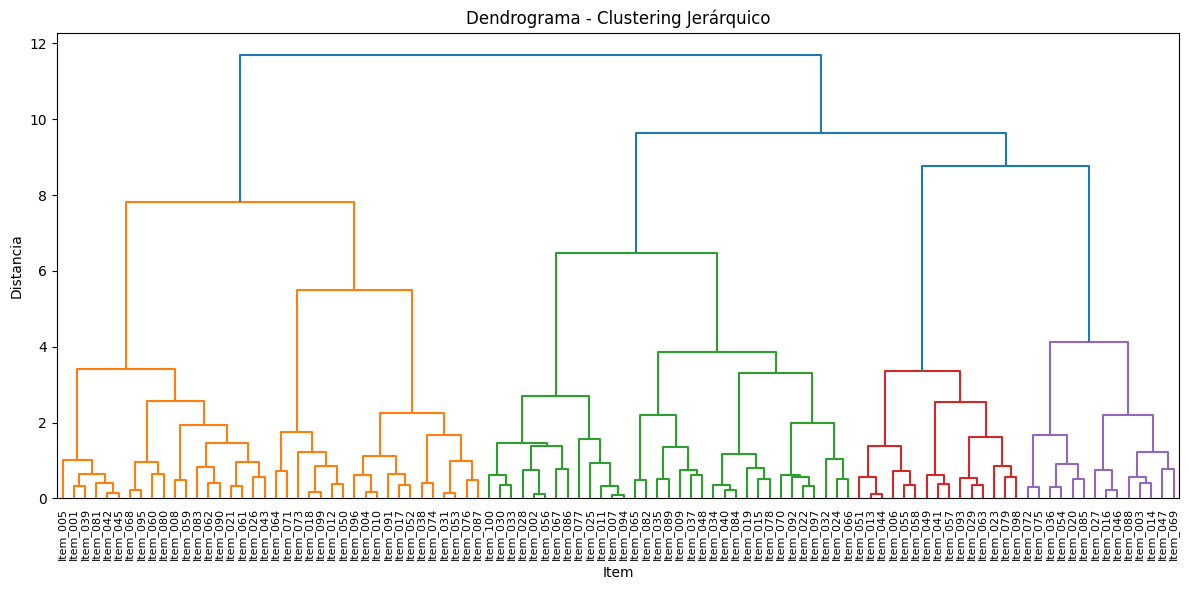

In [5]:
# Crear dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df['Item_ID'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Item')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

## 📦 Paso 6: Agrupar ítems y asignar etiquetas

In [6]:
# Elegir número de clusters visualmente (p. ej. 3)
n_clusters = 3
df['Cluster'] = fcluster(linked, t=n_clusters, criterion='maxclust')
df[['Item_ID', 'Frecuencia_uso', 'Volumen', 'Peso', 'Cluster']].head()

,Item_ID,Frecuencia_uso,Volumen,Peso,Cluster
0,Item_001,52,0.63,5.42,1
1,Item_002,93,1.13,41.93,2
2,Item_003,15,0.37,16.72,3
3,Item_004,72,1.62,10.14,1
4,Item_005,61,0.24,3.00,1


## 📈 Paso 7: Visualizar agrupamientos

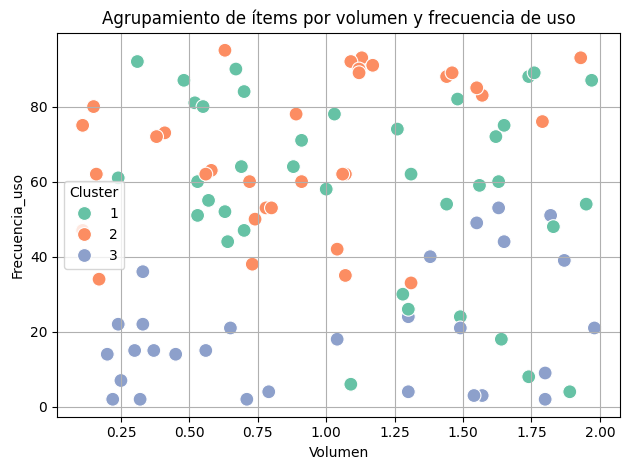

In [7]:
sns.scatterplot(data=df, x='Volumen', y='Frecuencia_uso', hue='Cluster', palette='Set2', s=100)
plt.title('Agrupamiento de ítems por volumen y frecuencia de uso')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧾 Paso 8: Interpretación para optimización del layout

In [8]:
# Resumen por grupo
df.groupby('Cluster')[['Frecuencia_uso', 'Volumen', 'Peso']].mean().round(2)

,Frecuencia_uso,Volumen,Peso
Cluster,,,
1,58.92,1.14,11.47
2,68.42,0.90,37.29
3,19.72,1.02,32.54
